In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
RANDOM_SEED = 0

In [5]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))


Text(0, 0.5, 'X2')

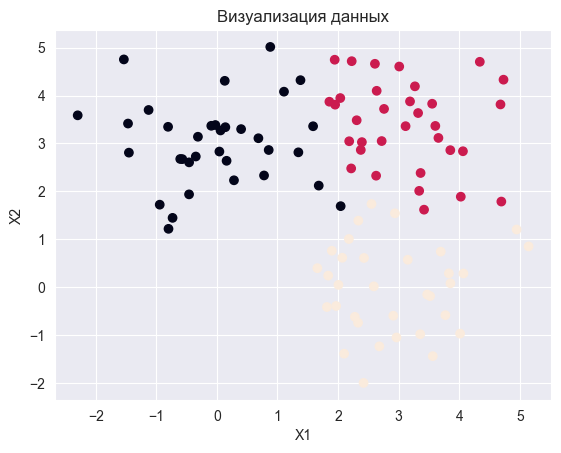

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
depth=4
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth, 
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

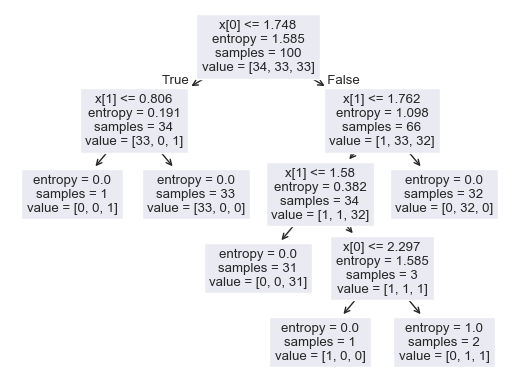

In [9]:
plot_tree(clf_tree) 
plt.show()

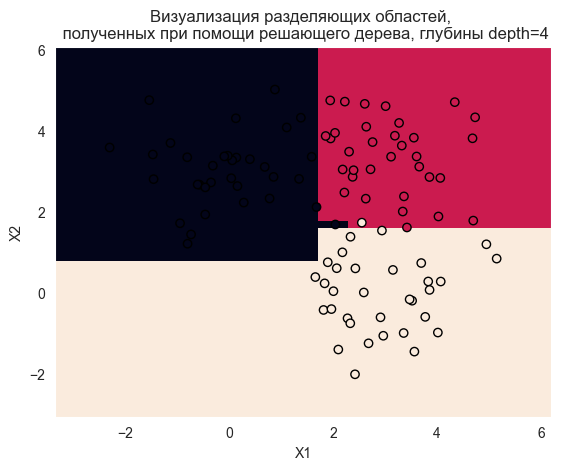

In [10]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
observation_new = [[2, 1]]

In [12]:
clf_tree.predict(observation_new)

array([2])

In [13]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [14]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


In [15]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape(-1,1)
y = np.exp(X[:, 0] ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

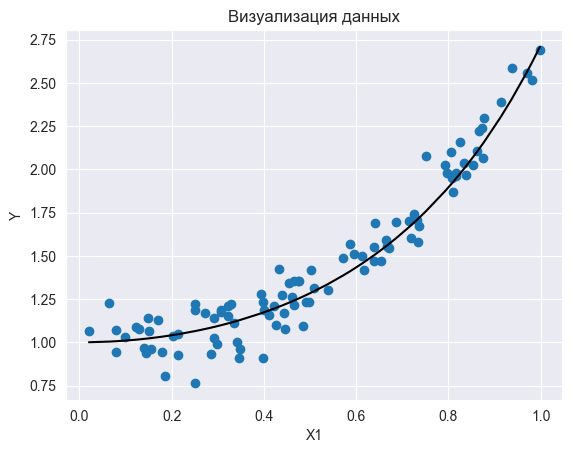

In [16]:
plt.scatter(X[:, 0], y)
plt.plot(X[:, 0], np.exp(X[:, 0] ** 2), c='k')

plt.title("Визуализация данных")
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
depth=5
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=0)

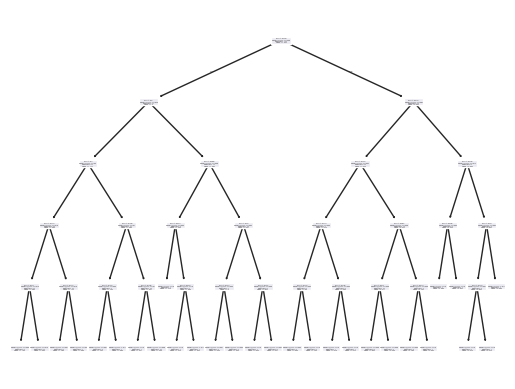

In [19]:
plot_tree(reg_tree) 
plt.show()

In [20]:
y_pred_reg = reg_tree.predict(X)

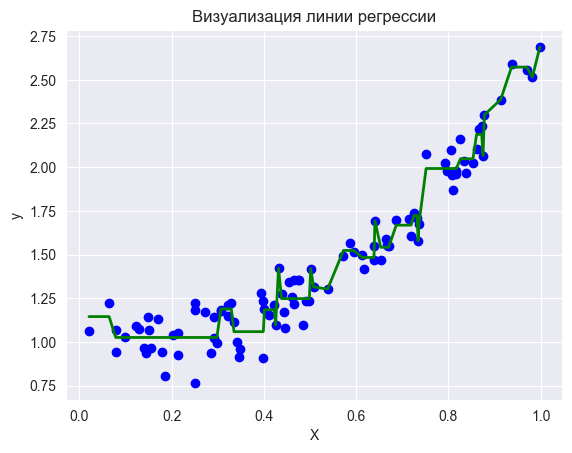

In [21]:
plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9680836226577085
MSE=  0.006547386749982946


In [24]:
def foo(X):
    if X < 0.4:
        return X * 0.02 + 15
    elif X < 0.6:
        return X * 0.04 + 23
    elif X < 0.7:
        return X * 0.01 + 35
    else:
        return 8

In [25]:
n_samples = 100
X = np.sort(np.random.rand(n_samples)).reshape((-1, 1))
y = np.array(list(map(foo, X[:, 0]))) + np.random.normal(0.0, 0.3, X.shape[0])

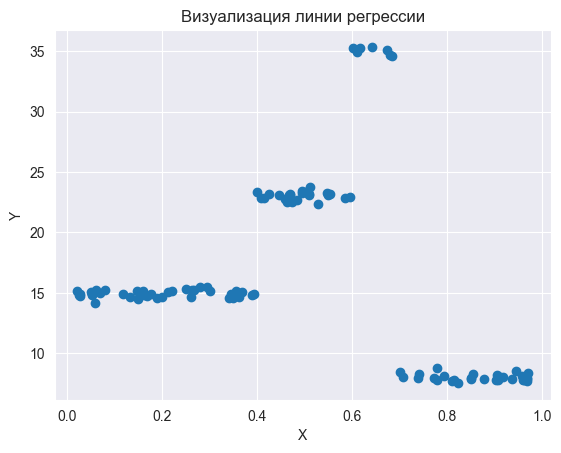

In [26]:
plt.scatter(X[:, 0], y,)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

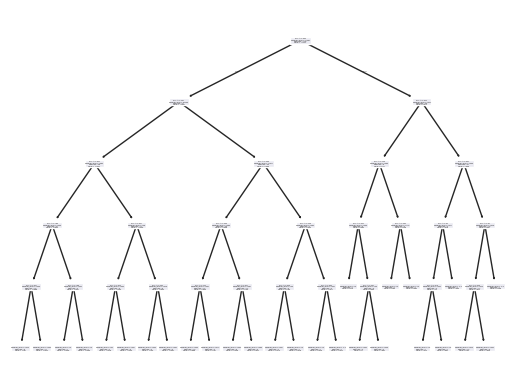

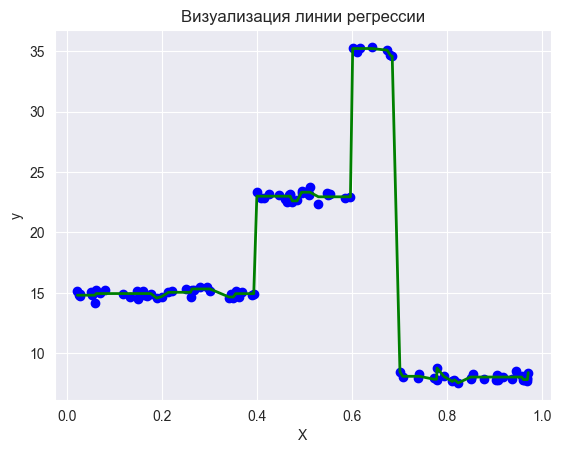

In [27]:
depth = 5
reg_tree = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X, y)
plot_tree(reg_tree)
plt.show()
y_pred_reg = reg_tree.predict(X)
plt.scatter(X, y, c="b")
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [28]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9993263124182639
MSE=  0.03845856716578091


In [29]:
# Iris: последние два столбца (длина и ширина лепестков)
# Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

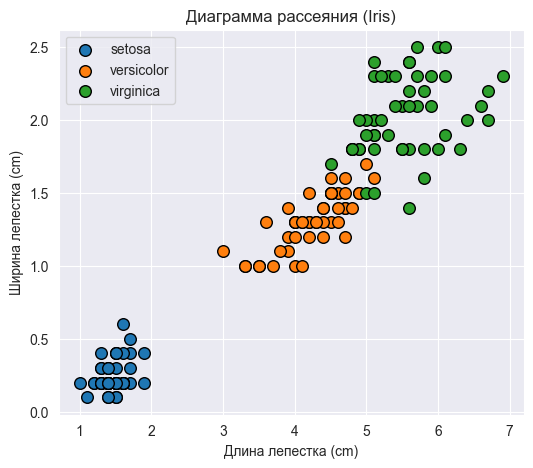

In [30]:
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data[:, 2:]  # последние два столбца: petal length и petal width
y = iris.target

df_iris = pd.DataFrame(X, columns=iris.feature_names[2:])
df_iris['species'] = y

# Визуализация: диаграмма рассеяния
plt.figure(figsize=(6, 5))
for cls in np.unique(y):
    plt.scatter(df_iris.loc[df_iris['species'] == cls, 'petal length (cm)'],
                df_iris.loc[df_iris['species'] == cls, 'petal width (cm)'],
                label=iris.target_names[cls],
                edgecolor='black',
                s=70)
plt.xlabel('Длина лепестка (cm)')
plt.ylabel('Ширина лепестка (cm)')
plt.title('Диаграмма рассеяния (Iris)')
plt.legend()
plt.show()

In [ ]:
# Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

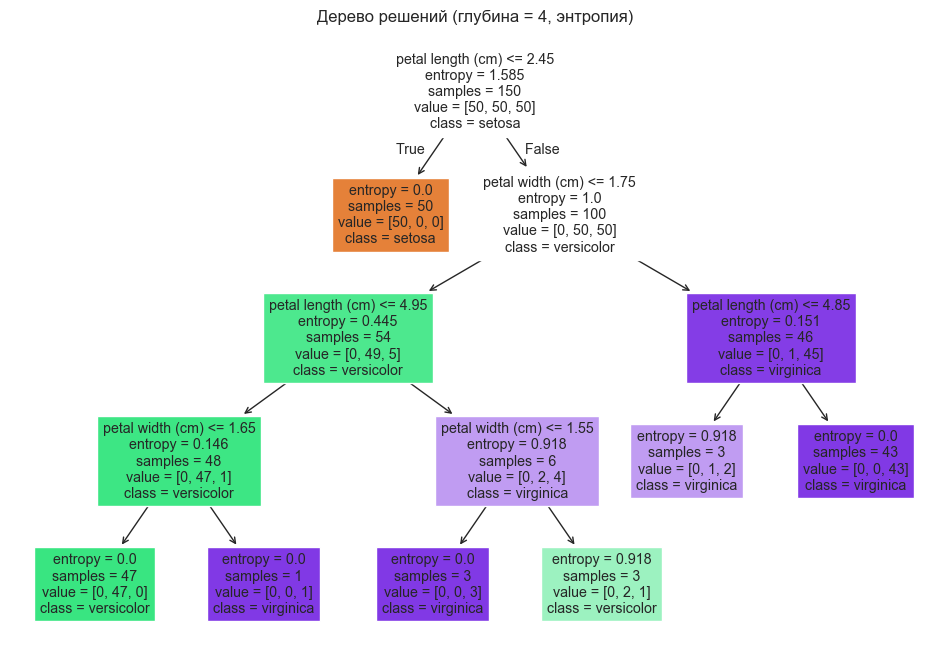

In [31]:
clf_iris = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_iris.fit(X, y)

# Визуализация дерева
plt.figure(figsize=(12, 8))
plot_tree(clf_iris, feature_names=iris.feature_names[2:], class_names=iris.target_names, filled=True)
plt.title('Дерево решений (глубина = 4, энтропия)')
plt.show()

In [ ]:
# Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области. Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

Глубина 1: Accuracy = 0.6667
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


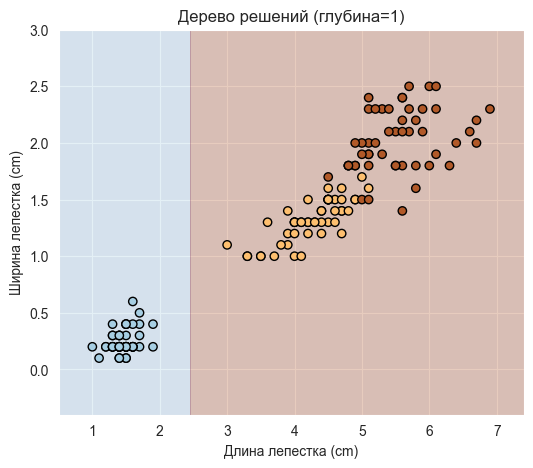

Глубина 2: Accuracy = 0.9600
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


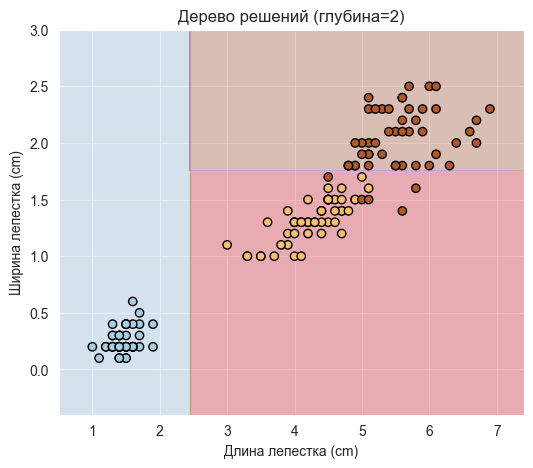

Глубина 3: Accuracy = 0.9733
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


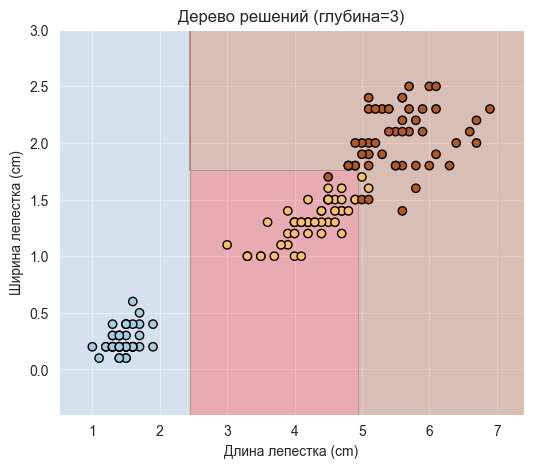

Глубина 4: Accuracy = 0.9867
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


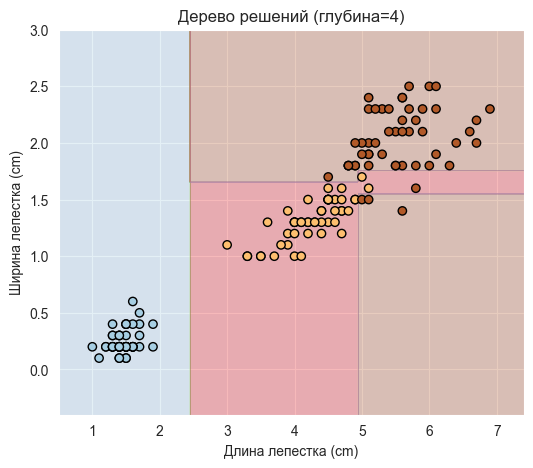

Глубина 10: Accuracy = 0.9933
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


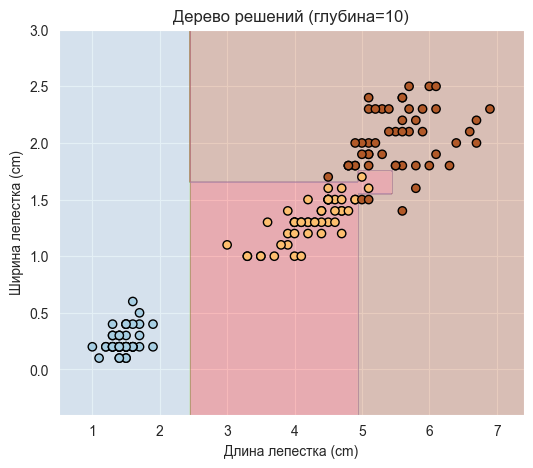


Сводная таблица по глубинам:
   Depth  Accuracy
0      1  0.666667
1      2  0.960000
2      3  0.973333
3      4  0.986667
4     10  0.993333


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

def plot_decision_regions(X, y, model, title):
    # Определяем границы области
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    # Предсказания на сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', cmap=plt.cm.Paired)
    plt.xlabel('Длина лепестка (cm)')
    plt.ylabel('Ширина лепестка (cm)')
    plt.title(title)
    plt.show()

depths = [1, 2, 3, 4, 10]
results_depth = []

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    results_depth.append({"Depth": depth, "Accuracy": acc})
    print(f"Глубина {depth}: Accuracy = {acc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    plot_decision_regions(X, y, clf, title=f"Дерево решений (глубина={depth})")

results_depth_df = pd.DataFrame(results_depth)
print("\nСводная таблица по глубинам:")
print(results_depth_df)


In [ ]:
# Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

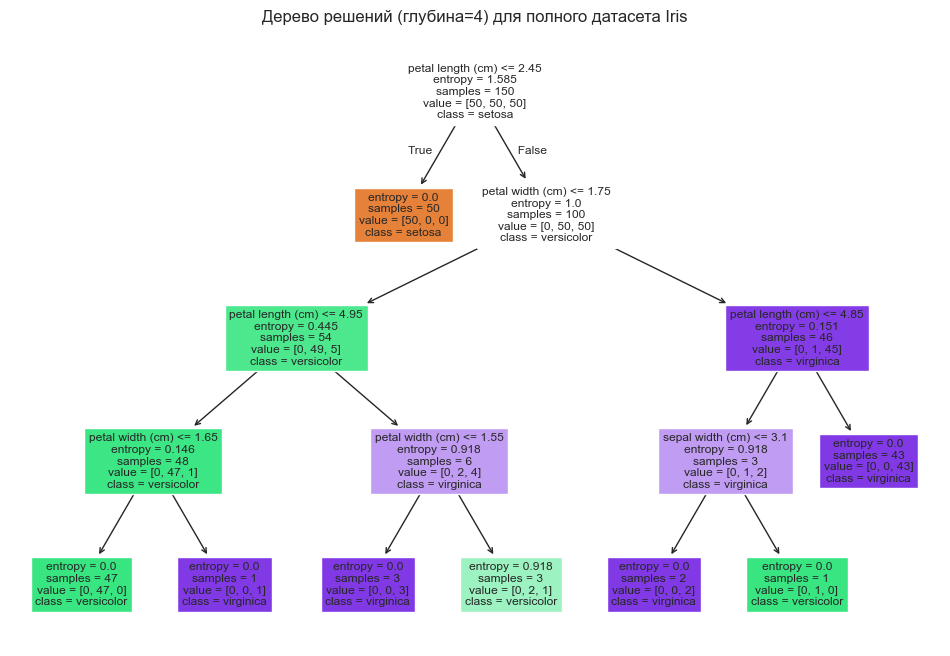

Accuracy (полный датасет): 0.9933333333333333
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]


In [33]:
iris_full = load_iris()
X_full = iris_full.data
y_full = iris_full.target

clf_full = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf_full.fit(X_full, y_full)
y_pred_full = clf_full.predict(X_full)
acc_full = accuracy_score(y_full, y_pred_full)
cm_full = confusion_matrix(y_full, y_pred_full)

plt.figure(figsize=(12, 8))
plot_tree(clf_full, feature_names=iris_full.feature_names, class_names=iris_full.target_names, filled=True)
plt.title('Дерево решений (глубина=4) для полного датасета Iris')
plt.show()

print("Accuracy (полный датасет):", acc_full)
print("Confusion Matrix:")
print(cm_full)

In [ ]:
# Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

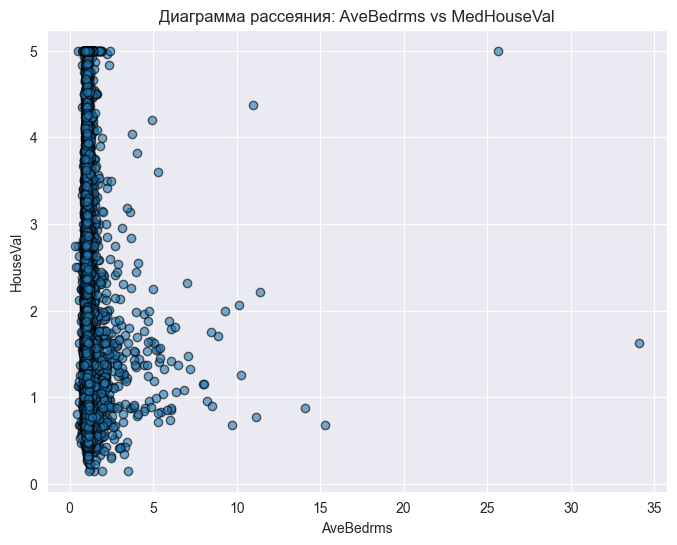

In [36]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
X_housing = housing.frame[['AveBedrms']]
y_housing = housing.target 

plt.figure(figsize=(8, 6))
plt.scatter(X_housing, y_housing, alpha=0.6, edgecolor='k')
plt.xlabel('AveBedrms')
plt.ylabel('HouseVal')
plt.title('Диаграмма рассеяния: AveBedrms vs MedHouseVal')
plt.show()
